In [220]:
from sklearn.datasets import load_iris
from sklearn.datasets import make_moons
from sklearn.decomposition import KernelPCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
%matplotlib inline
from copy import deepcopy
from numpy import *
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [221]:
#k-means聚类
# 加载数据
def loadDataSet(fileName):  # 解析文件，按tab分割字段，得到一个浮点数字类型的矩阵
    dataMat = []              # 文件的最后一个字段是类别标签
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = map(float, curLine)    # 将每个元素转成float类型
        dataMat.append(fltLine)
    return dataMat

# 计算欧几里得距离
def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) # 求两个向量之间的距离

# 构建聚簇中心，取k个(此例中为4)随机质心
def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))   # 每个质心有n个坐标值，总共要k个质心
    for j in range(n):
        minJ = min(dataSet[:,j])
        maxJ = max(dataSet[:,j])
        rangeJ = float(maxJ - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k, 1)
    return centroids

def kMeans(dataSet, k, distMeans =distEclud, createCent = randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))    # 用于存放该样本属于哪类及质心距离
    # clusterAssment第一列存放该数据所属的中心点，第二列是该数据到中心点的距离
    centroids = createCent(dataSet, k)
    clusterChanged = True   # 用来判断聚类是否已经收敛
    while clusterChanged:
        clusterChanged = False;
        for i in range(m):  # 把每一个数据点划分到离它最近的中心点
            minDist = inf; minIndex = -1;
            for j in range(k):
                distJI = distMeans(centroids[j,:], dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j  # 如果第i个数据点到第j个中心点更近，则将i归属为j
            if clusterAssment[i,0] != minIndex: clusterChanged = True;  # 如果分配发生变化，则需要继续迭代
            clusterAssment[i,:] = minIndex,minDist**2   # 并将第i个数据点的分配情况存入字典
        print(centroids)
        for cent in range(k):   # 重新计算中心点
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A == cent)[0]]   # 去第一列等于cent的所有列
            centroids[cent,:] = mean(ptsInClust, axis = 0)  # 算出这些数据的中心点
    return centroids, clusterAssment

In [122]:
X = pd.read_excel('指标更新后.xlsx').loc[:,['是否金牌卖家','男装','女装']]
X = X.dropna()

In [222]:
low_d = pd.read_excel('KPCA二维坐标1.xlsx').drop(columns=['Unnamed: 0'])
low_d

,V1,V2
0,-0.000354,0.004135
1,-0.019378,-0.067860
2,-0.005809,-0.032824
3,0.040734,-0.011854
4,-0.057839,-0.091893
...,...,...
221,-0.015759,-0.007130
222,0.011916,-0.014338
223,-0.005639,-0.025950
224,0.008526,-0.016283


In [223]:
X = pd.concat([X,low_d],axis=1)
X = X.dropna()
X

,是否金牌卖家,男装,女装,V1,V2,V3,V4,V5,V1,V2,V3,V4,V5,V1,V2
0,0,0,1,-0.008955,0.078683,0.110719,0.011677,0.003137,-0.008955,0.078683,0.110719,0.011677,0.003137,-0.000354,0.004135
1,1,0,1,-0.031809,0.020389,0.013393,0.555334,-0.050370,-0.031809,0.020389,0.013393,0.555334,-0.050370,-0.019378,-0.067860
2,0,0,1,0.008084,-0.008066,0.034976,-0.000263,0.019600,0.008084,-0.008066,0.034976,-0.000263,0.019600,-0.005809,-0.032824
3,1,1,0,0.002031,0.014563,-0.005296,-0.011964,-0.011931,0.002031,0.014563,-0.005296,-0.011964,-0.011931,0.040734,-0.011854
4,1,1,0,0.589790,0.223266,-0.010035,0.076212,0.183509,0.589790,0.223266,-0.010035,0.076212,0.183509,-0.057839,-0.091893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,0,1,0,0.000995,-0.002176,-0.007376,-0.016530,-0.027313,0.000995,-0.002176,-0.007376,-0.016530,-0.027313,-0.015759,-0.007130
222,0,0,0,-0.020003,0.004200,0.030021,0.012143,0.057307,-0.020003,0.004200,0.030021,0.012143,0.057307,0.011916,-0.014338
223,0,1,0,-0.019593,-0.008714,0.048974,0.023623,0.019524,-0.019593,-0.008714,0.048974,0.023623,0.019524,-0.005639,-0.025950
224,0,1,0,-0.007834,0.003561,0.024095,0.001041,-0.000701,-0.007834,0.003561,0.024095,0.001041,-0.000701,0.008526,-0.016283


In [224]:
datMat = np.mat(low_d)
myCentroids,clustAssing = kMeans(datMat,5)
print(myCentroids)

[[-0.22713108  0.26217525]
 [ 0.08151524  0.23709894]
 [-0.2433822   0.19435389]
 [ 0.00930585  0.08289277]
 [ 0.1311887   0.19439967]]
[[-0.11673432  0.26148466]
 [ 0.01008651  0.26198871]
 [-0.24438268 -0.04076861]
 [-0.0038515  -0.00733309]
 [ 0.28468931  0.01148872]]
[[-0.0921641   0.23092887]
 [ 0.00374895  0.22247395]
 [-0.16142774 -0.05410704]
 [ 0.00230753 -0.00887015]
 [ 0.28468931  0.01148872]]
[[-0.08211414  0.1888683 ]
 [ 0.0213191   0.19408657]
 [-0.13558894 -0.05792895]
 [ 0.00541834 -0.00903411]
 [ 0.33150299 -0.02666832]]
[[-0.07257777  0.17651651]
 [ 0.03120098  0.18275299]
 [-0.117107   -0.05856887]
 [ 0.00675685 -0.00881133]
 [ 0.33150299 -0.02666832]]
[[-0.05950324  0.15092327]
 [ 0.03823267  0.18184522]
 [-0.11318996 -0.05318583]
 [ 0.008151   -0.0098725 ]
 [ 0.33150299 -0.02666832]]
[[-0.04827346  0.12924056]
 [ 0.04227891  0.19084941]
 [-0.11318996 -0.05318583]
 [ 0.00859456 -0.01077794]
 [ 0.33150299 -0.02666832]]
[[-0.04536872  0.11766047]
 [ 0.04227891  0.1908

In [243]:
result = pd.DataFrame(clustAssing)
result.columns = ["type","dist"]
result.groupby("type").describe()

dist                                                              \
      count      mean       std       min       25%       50%       75%   
type                                                                      
0.0    40.0  0.003621  0.004471  0.000171  0.000881  0.001516  0.005057   
1.0     9.0  0.005138  0.003688  0.000219  0.003835  0.004211  0.006757   
2.0    22.0  0.006448  0.004963  0.000025  0.004099  0.005163  0.007580   
3.0   152.0  0.001892  0.004326  0.000004  0.000225  0.000604  0.001475   
4.0     3.0  0.003873  0.002863  0.000611  0.002826  0.005041  0.005504   

                
           max  
type            
0.0   0.023415  
1.0   0.011693  
2.0   0.018314  
3.0   0.028247  
4.0   0.005967

In [251]:
re[y==1][:].describe().to_excel('类别为1.xlsx')

In [252]:
re[y==0][:].describe().to_excel('类别为0.xlsx')

In [253]:
re[y==2][:].describe().to_excel('类别为2.xlsx')

In [254]:
re[y==3][:].describe().to_excel('类别为3.xlsx')

In [255]:
re[y==4][:].describe().to_excel('类别为4.xlsx')

In [257]:
a = re[y==1][:].describe()

In [258]:
a.to_excel('类别为1.xlsx')

In [259]:
b = re[y==0][:].describe()
b.to_excel('类别为0.xlsx')

In [260]:
b = re[y==2][:].describe()
b.to_excel('类别为2.xlsx')

In [261]:
b = re[y==3][:].describe()
b.to_excel('类别为3.xlsx')

In [262]:
b = re[y==4][:].describe()
b.to_excel('类别为4.xlsx')

In [235]:
da = pd.read_excel('指标更新后.xlsx').drop(columns=['店铺id'])
da = da.dropna()
da.index = range(226)
da

,店铺,卖家信用,距今天数,描述相符,服务态度,店铺收藏数,物流服务,宝贝数,好评率,是否金牌卖家,...,评价数中位数,价格均值,平均月销量,商品最低价,发货时间,公益宝贝计划,交易成功比率,7天上新数,30天销售额,销售环比
0,三木子快时尚女装,20,2112,4.70,4.80,9066945,4.80,6726,0.9923,0,...,1045.5,31.780600,1150.172000,9.80,3.0,53934.666667,0.733164,0.0,1407100.00,0.010000
1,下架学姐XJXJ,20,2267,4.80,4.80,5247750,4.80,7693,0.9945,1,...,710.5,33.742000,842.812000,9.98,5.0,0.000000,0.714085,1629.0,9960700.00,0.010000
2,左小姐来了,20,2237,4.70,4.70,4071101,4.70,6841,0.9905,0,...,280.5,30.214700,452.284000,9.90,5.0,0.000000,0.688849,0.0,412500.00,0.010000
3,兔先森的原创小铺,18,3211,4.80,4.80,2809809,4.80,633,0.9964,1,...,157.5,102.750000,198.842000,39.00,2.0,157.140000,0.790634,64.0,7849300.00,-0.230000
4,二更大码男装原创工作室,19,2133,4.80,4.84,2705963,4.84,922,0.9949,1,...,98.0,69.590200,461.806000,10.00,3.0,0.000000,0.797297,17.0,209800.00,-0.330000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,峻哲男装服饰店,9,1721,4.68,4.74,105,4.76,8,0.9678,0,...,3.0,19.875000,2516.750000,9.90,2.0,0.000000,0.884615,50.0,967400.00,-0.280000
222,木子服饰网批,10,221,4.36,4.47,93,4.53,179,0.9782,0,...,3.0,22.552212,15.951923,9.80,3.0,2.730000,0.643793,0.0,8071.52,0.540808
223,喜儿品质服饰,9,183,4.52,4.63,12,4.67,27,0.9788,0,...,46.5,148.292105,9659.394737,116.90,3.0,0.000000,0.998710,0.0,16400.00,0.395378
224,蓝艺韩式女装,15,3092,4.63,4.73,2,4.75,240,0.9742,0,...,1.0,37.653793,48.089655,14.80,2.0,0.000000,0.833333,7.0,663600.00,-0.290000


In [236]:
re = pd.concat([result,da],axis=1)
# re = re.dropna()
re

,type,dist,V1,V2,店铺,卖家信用,距今天数,描述相符,服务态度,店铺收藏数,...,评价数中位数,价格均值,平均月销量,商品最低价,发货时间,公益宝贝计划,交易成功比率,7天上新数,30天销售额,销售环比
0,3.0,0.000671,-0.000354,0.004135,三木子快时尚女装,20,2112,4.70,4.80,9066945,...,1045.5,31.780600,1150.172000,9.80,3.0,53934.666667,0.733164,0.0,1407100.00,0.010000
1,3.0,0.003037,-0.019378,-0.067860,下架学姐XJXJ,20,2267,4.80,4.80,5247750,...,710.5,33.742000,842.812000,9.98,5.0,0.000000,0.714085,1629.0,9960700.00,0.010000
2,3.0,0.000359,-0.005809,-0.032824,左小姐来了,20,2237,4.70,4.70,4071101,...,280.5,30.214700,452.284000,9.90,5.0,0.000000,0.688849,0.0,412500.00,0.010000
3,3.0,0.001118,0.040734,-0.011854,兔先森的原创小铺,18,3211,4.80,4.80,2809809,...,157.5,102.750000,198.842000,39.00,2.0,157.140000,0.790634,64.0,7849300.00,-0.230000
4,2.0,0.004562,-0.057839,-0.091893,二更大码男装原创工作室,19,2133,4.80,4.84,2705963,...,98.0,69.590200,461.806000,10.00,3.0,0.000000,0.797297,17.0,209800.00,-0.330000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,3.0,0.000754,-0.015759,-0.007130,峻哲男装服饰店,9,1721,4.68,4.74,105,...,3.0,19.875000,2516.750000,9.90,2.0,0.000000,0.884615,50.0,967400.00,-0.280000
222,3.0,0.000048,0.011916,-0.014338,木子服饰网批,10,221,4.36,4.47,93,...,3.0,22.552212,15.951923,9.80,3.0,2.730000,0.643793,0.0,8071.52,0.540808
223,3.0,0.000229,-0.005639,-0.025950,喜儿品质服饰,9,183,4.52,4.63,12,...,46.5,148.292105,9659.394737,116.90,3.0,0.000000,0.998710,0.0,16400.00,0.395378
224,3.0,0.000016,0.008526,-0.016283,蓝艺韩式女装,15,3092,4.63,4.73,2,...,1.0,37.653793,48.089655,14.80,2.0,0.000000,0.833333,7.0,663600.00,-0.290000


In [166]:
re[y==1]

,type,dist,店铺,卖家信用,距今天数,描述相符,服务态度,店铺收藏数,物流服务,宝贝数,...,评价数中位数,价格均值,平均月销量,商品最低价,发货时间,公益宝贝计划,交易成功比率,7天上新数,30天销售额,销售环比
17,1.0,0.024377,CannedPineapple凤梨罐头欧美潮流女装,17,3262,4.8,4.80,478826,4.80,616,...,28.5,59.955540,75.984000,29.9,1.0,0.00,0.710526,0.0,4131700.0,0.26
44,1.0,0.018230,霏凡男装,16,3011,4.8,4.90,66605,4.90,457,...,3.0,72.623800,48.230000,17.0,7.0,341.44,0.525000,8.0,2651100.0,0.26
164,1.0,0.031708,浪漫女装优选,11,2206,4.8,4.83,4638,4.85,516,...,0.0,66.232376,4.190601,39.0,3.0,0.00,0.535714,8.0,310600.0,-0.58


In [ ]:
re[y==]

In [244]:
y = result['type'].astype('int').values

In [142]:
y

array([2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0,
       2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 3, 2, 1, 1, 1, 2, 0, 2,
       1, 2, 0, 2, 1, 1, 1, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       2, 2, 0, 2, 2, 2, 2, 2, 1, 3, 2, 1, 1, 2, 0, 1, 1, 2, 2, 3, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0,
       2, 0, 1, 2, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       1, 1, 1, 0, 2, 2, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 0, 3, 2, 0, 0, 2,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2, 0, 0, 3, 2, 1, 0,
       0, 2, 0, 1, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0,
       2, 0, 2, 0, 0, 2])

In [227]:
result['V1'] = low_d['V1']
result['V2'] = low_d['V2']
# result['V3'] = low_d['V3']
result

,type,dist,V1,V2
0,3.0,0.000671,-0.000354,0.004135
1,3.0,0.003037,-0.019378,-0.067860
2,3.0,0.000359,-0.005809,-0.032824
3,3.0,0.001118,0.040734,-0.011854
4,2.0,0.004562,-0.057839,-0.091893
...,...,...,...,...
221,3.0,0.000754,-0.015759,-0.007130
222,3.0,0.000048,0.011916,-0.014338
223,3.0,0.000229,-0.005639,-0.025950
224,3.0,0.000016,0.008526,-0.016283


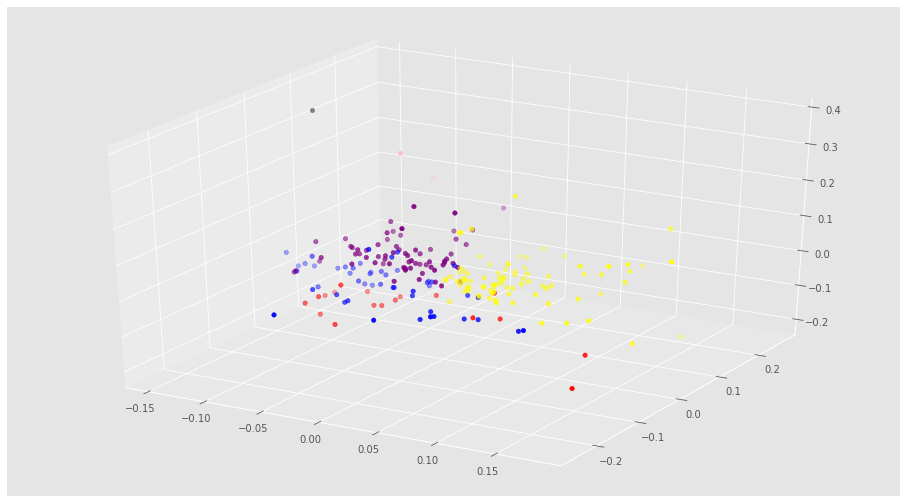

In [219]:
#三维
from mpl_toolkits.mplot3d import Axes3D
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

ax2.scatter(result[y==0].iloc[:,2],result[y==0].iloc[:,3], result[y==0].iloc[:,4], s=20, c='red', marker='o')
ax2.scatter(result[y==1].iloc[:,2],result[y==1].iloc[:,3], result[y==1].iloc[:,4], s=20, c='blue', marker='o')
ax2.scatter(result[y==2].iloc[:,2],result[y==2].iloc[:,3], result[y==2].iloc[:,4], s=20, c='green', marker='o')
ax2.scatter(result[y==3].iloc[:,2],result[y==3].iloc[:,3], result[y==3].iloc[:,4], s=20, c='yellow', marker='o')
ax2.scatter(result[y==4].iloc[:,2],result[y==4].iloc[:,3], result[y==4].iloc[:,4], s=20, c='pink', marker='o')
ax2.scatter(result[y==5].iloc[:,2],result[y==5].iloc[:,3], result[y==5].iloc[:,4], s=20, c='grey', marker='o')
ax2.scatter(result[y==6].iloc[:,2],result[y==6].iloc[:,3], result[y==6].iloc[:,4], s=20, c='purple', marker='o')

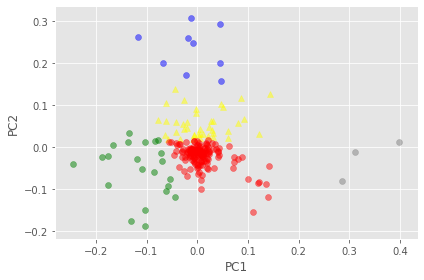

In [228]:
#二维
plt.scatter(result[y==0].iloc[:,2], result[y==0].iloc[:,3], color='yellow', marker='^', alpha=0.5)
plt.scatter(result[y==1].iloc[:,2], result[y==1].iloc[:,3], color='blue', marker='o', alpha=0.5)
plt.scatter(result[y==2].iloc[:,2], result[y==2].iloc[:,3], color='green', marker='o', alpha=0.5)
plt.scatter(result[y==3].iloc[:,2], result[y==3].iloc[:,3], color='red', marker='o', alpha=0.5)
plt.scatter(result[y==4].iloc[:,2], result[y==4].iloc[:,3], color='grey', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

In [63]:
plt.savefig('二维K-均值聚类.jpg')

<Figure size 432x288 with 0 Axes>

In [76]:
result[y==0]

,type,dist,V1,V2
14,0.0,0.072795,0.601160,-0.033162
24,0.0,0.028143,0.212328,0.141140
69,0.0,0.020305,0.204062,-0.013889


In [77]:
result[y==1]

,type,dist,V1,V2
1,1.0,0.002072,-0.016375,-0.044985
2,1.0,0.040939,-0.038605,-0.275893
6,1.0,0.003659,-0.045436,-0.097374
9,1.0,0.000852,0.005853,-0.051712
29,1.0,0.027631,-0.048807,-0.234619
30,1.0,0.001568,0.001470,-0.042109
32,1.0,0.001598,0.010231,-0.040222
37,1.0,0.006327,-0.065600,-0.065291
41,1.0,0.000090,0.021216,-0.076269
55,1.0,0.008541,0.090766,-0.030911


In [78]:
result[y==2]

,type,dist,V1,V2
8,2.0,0.055783,-0.294374,-0.255097
12,2.0,0.004244,-0.103972,-0.032935
15,2.0,0.001941,-0.174759,-0.015381
27,2.0,0.006404,-0.104535,-0.004622
28,2.0,0.027128,-0.327647,-0.077223
48,2.0,0.000714,-0.141625,-0.072633
71,2.0,0.005276,-0.100893,-0.022252
72,2.0,0.007946,-0.097453,0.001126
77,2.0,0.001276,-0.131212,-0.044069


In [79]:
result[y==3]

,type,dist,V1,V2
0,3.0,0.000401,-0.010084,-0.003020
3,3.0,0.000547,-0.019722,0.013015
4,3.0,0.008669,0.096716,0.010652
5,3.0,0.000153,0.000513,-0.000388
7,3.0,0.001799,0.014961,0.052440
...,...,...,...,...
221,3.0,0.000574,0.014816,-0.009595
222,3.0,0.000467,0.008732,-0.009427
223,3.0,0.000118,-0.006682,0.008055
224,3.0,0.000036,0.003810,0.017530


In [81]:
result[y==4].index

Int64Index([21, 23, 39, 53, 54, 61, 159], dtype='int64')

In [83]:
data = pd.read_excel('27个指标.xlsx').drop(columns=["Unnamed: 0"])
data

,卖家信用,距今天数,描述相符,所在地区,宝贝数,好评率,是否金牌卖家,是否有实体店,男装,女装,...,运费险,公益宝贝计划,订单险,交易成功比率,蚂蚁花呗支付,信用卡支付,是否直播,7天上新数,30天销售额,销售环比
0,18,1892,4.8,4,842,0.9952,1,0,1,0,...,0,86.300000,0,0.738739,1,1,1,0,717800.00,-0.270000
1,13,4688,4.7,2,23,0.9818,1,0,0,1,...,0,0.000000,1,0.629630,1,1,0,0,1032200.00,0.550000
2,11,4363,0.0,2,10,0.9920,0,1,1,0,...,0,0.000000,0,0.719298,0,0,0,0,3072100.00,-0.330000
3,18,4353,4.7,4,877,0.9916,1,0,1,0,...,0,0.000000,0,0.697286,1,1,0,0,1557100.00,0.080000
4,16,4185,4.8,6,1672,0.9972,1,0,1,1,...,1,53.033333,0,0.877551,1,1,1,0,284600.00,-0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,11,185,0.0,5,213,0.9833,0,0,1,0,...,0,1.150000,0,0.940035,1,1,0,0,10100.00,-0.158004
222,11,297,0.0,4,94,0.9996,1,1,0,0,...,1,4.210000,0,0.747742,1,1,0,0,19500.00,-0.202204
223,11,250,0.0,4,20,0.9977,0,1,0,0,...,1,0.000000,0,1.000000,1,1,0,0,32800.00,0.107614
224,10,221,0.0,5,179,0.9782,0,0,1,0,...,1,2.730000,0,0.643793,1,1,0,0,8071.52,0.540808


In [ ]:
df_1 = pd.DataFrame()
